## env setup

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import numpy as np

import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# data read

In [ ]:
%pwd

'/content'

In [ ]:
%cd drive/MyDrive/project_dsc540/data/movie_dataset/

/content/drive/MyDrive/project_dsc540/data/movie_dataset


In [ ]:
# read files
# raw_credits = pd.read_csv("credits.csv")
# raw_keywords = pd.read_csv("keywords.csv")
# raw_links = pd.read_csv("links.csv")
raw_metadata = pd.read_csv("movies_metadata.csv")
# raw_ratings = pd.read_csv("ratings.csv")

In [ ]:
pd.options.display.max_columns = 30

# EDA

In [ ]:
raw_metadata.shape

(45466, 24)

In [ ]:
raw_metadata.tagline.sample(5)

11200    A classic of childish heartache, courage, and ...
7718                                    Where will you be?
26624    MORE THAN GREAT COMEDY HERE'S GREAT ENTERTAINMENT
4411                     The Dirtiest Dancing Of Them All!
5075                How do you fight a war called madness?
Name: tagline, dtype: object

In [ ]:
raw_metadata.isna().sum()/raw_metadata.shape[0]

adult                    0.000000
belongs_to_collection    0.901157
budget                   0.000000
genres                   0.000000
homepage                 0.828839
id                       0.000000
imdb_id                  0.000374
original_language        0.000242
original_title           0.000000
overview                 0.020983
popularity               0.000110
poster_path              0.008490
production_companies     0.000066
production_countries     0.000066
release_date             0.001914
revenue                  0.000132
runtime                  0.005785
spoken_languages         0.000132
status                   0.001914
tagline                  0.551049
title                    0.000132
video                    0.000132
vote_average             0.000132
vote_count               0.000132
dtype: float64

Text(0.5, 1.0, 'Distribution of Overview length')

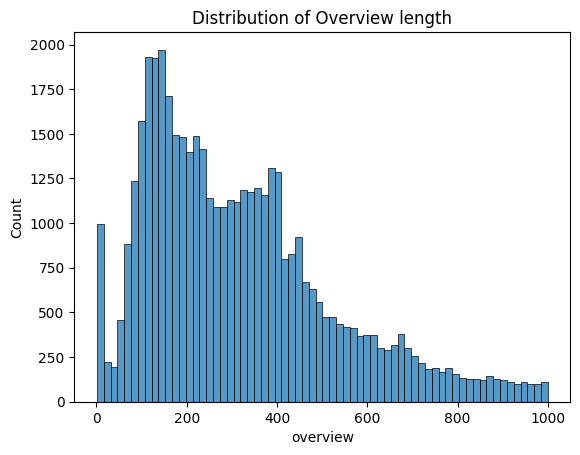

In [ ]:
sns.histplot(raw_metadata.overview.apply(lambda x:len(str(x))))
plt.title("Distribution of Overview length")

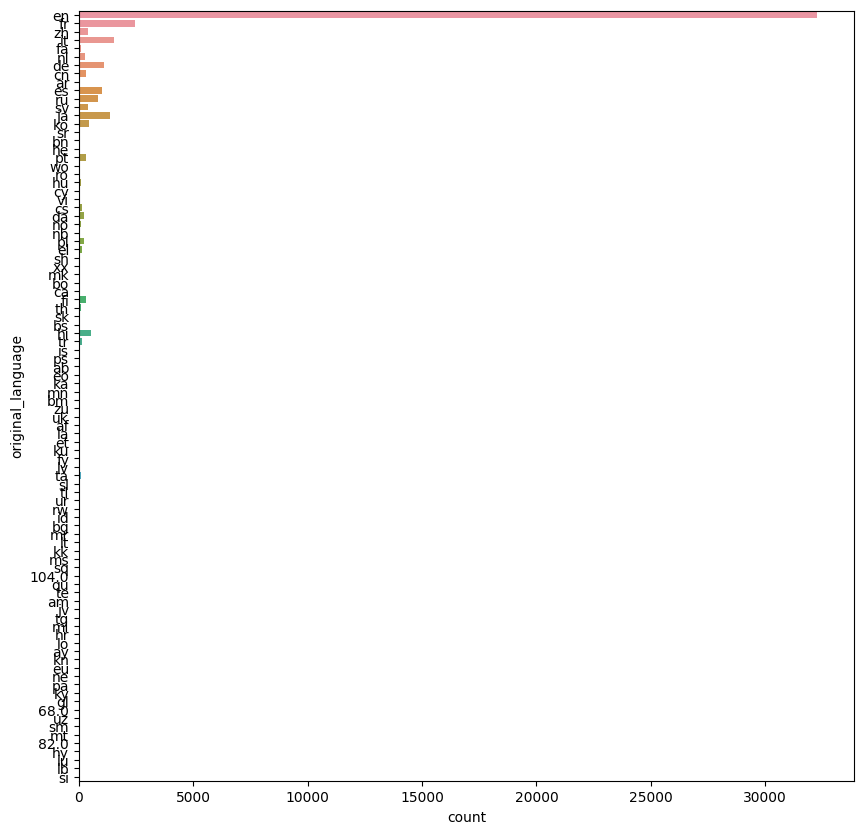

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(y='original_language', data=raw_metadata)
# plt.xticks(rotation=90)
plt.show()

In [ ]:
raw_metadata.original_language.value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [ ]:
for _, instance in raw_metadata.sample(5).iterrows():
  _

In [ ]:
instance.genres

"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]"

# data processing

In [ ]:
transformd_df = raw_metadata.copy()

In [ ]:
transformd_df['genres'] = transformd_df['genres'].apply(lambda x: json.loads(x.replace("'", '"')))

In [ ]:
transformd_df.genres

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [ ]:
transformd_df['genre_id'] = transformd_df['genres'].apply(lambda x: [entry['id'] for entry in x] if x else [])
transformd_df['genre_name'] = transformd_df['genres'].apply(lambda x: [entry['name'] for entry in x] if x else [])

In [ ]:
exploded_transformd_df = transformd_df.explode("genre_name")

In [ ]:
exploded_transformd_df.explode("genre_id")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_id,genre_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,16,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,35,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10751,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,16,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,35,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,28,Thriller
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,18,Thriller
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World 

In [ ]:
plt_df = exploded_transformd_df.groupby("genre_name").size().reset_index().rename({0:"movie_count"}, axis=1)

In [ ]:
plt_df.sort_values("movie_count", ascending=False, inplace=True)

In [ ]:
plt_df.head()

,genre_name,movie_count
9,Drama,20265
6,Comedy,13182
28,Thriller,7624
22,Romance,6735
0,Action,6596


Text(0.5, 1.0, 'Distribution of movie genre')

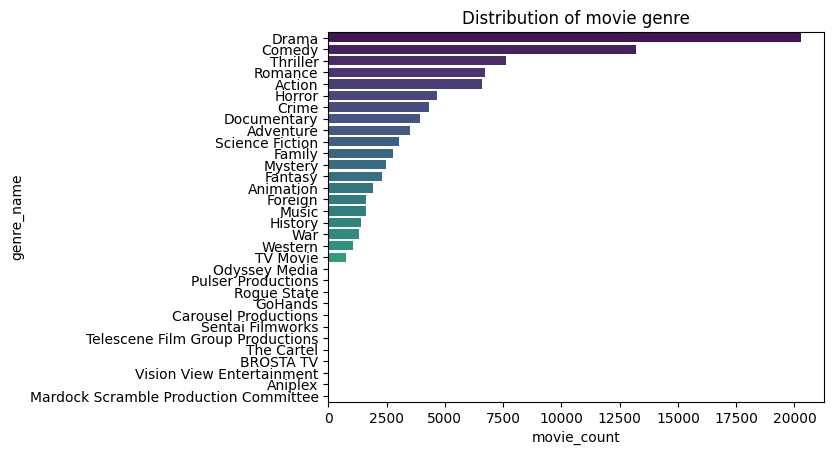

In [ ]:
sns.barplot(x='movie_count', y='genre_name', data = plt_df, palette='viridis')
plt.title("Distribution of movie genre")

# Text analytics

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
# remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
exploded_transformd_df.overview = exploded_transformd_df.overview.astype(str)

In [ ]:
wordcloud_df = exploded_transformd_df.groupby('genre_name')['overview'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
wordcloud_df.head()

,genre_name,overview
0,Action,"Obsessive master thief, Neil McCauley leads a ..."
1,Adventure,When siblings Judy and Peter discover an encha...
2,Animation,"Led by Woody, Andy's toys live happily in his ..."
3,Aniplex,Released
4,BROSTA TV,Released


In [ ]:
wordcloud_df['overview'] = wordcloud_df.overview.str.lower()

In [ ]:
tokenized_doc = wordcloud_df['overview'].apply(lambda x: x.split())

In [ ]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
wordcloud_df['clean_overview'] = tokenized_doc.astype(str).str.replace('\[|\]|\'', '')
wordcloud_df['clean_overview'] = wordcloud_df.clean_overview.str.replace(",",'')
wordcloud_df['clean_overview'] = wordcloud_df['clean_overview'].str.replace(r'\d+','')
wordcloud_df['clean_overview'] = wordcloud_df.clean_overview.str.replace(r'[^\w\s]', '')

In [ ]:
wordcloud_df.head()

,genre_name,overview,clean_overview
0,Action,"obsessive master thief, neil mccauley leads a ...",obsessive master thief neil mccauley leads top...
1,Adventure,when siblings judy and peter discover an encha...,siblings judy peter discover enchanted board g...
2,Animation,"led by woody, andy's toys live happily in his ...",led woody andys toys live happily room andys b...
3,Aniplex,released,released
4,BROSTA TV,released,released


In [ ]:
def top_n_words(text, n):
  most_freq_words = pd.Series(" ".join(text).split()).value_counts()
  return most_freq_words.head(n).sort_values(ascending = True).plot(kind="barh",title = "Top {n} Frequent Number Of Words".format(n = n))

<Axes: title={'center': 'Top 15 Frequent Number Of Words'}>

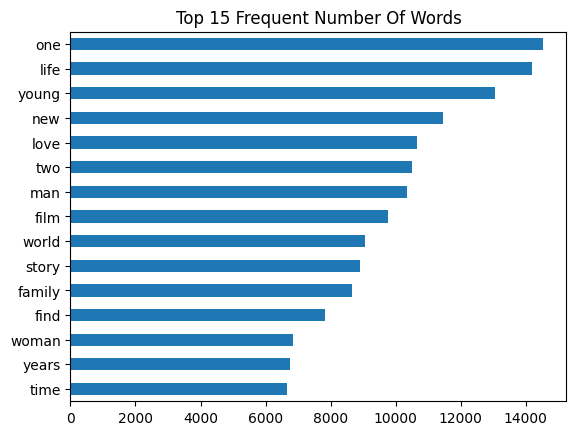

In [ ]:
top_n_words(wordcloud_df.clean_overview, 15)

In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')

In [ ]:
sparse_matrix = word_vectorizer.fit_transform(wordcloud_df['clean_overview'])

In [ ]:
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])

In [ ]:
bi_grams_df.sort_values("frequency", ascending=False)

,frequency
new york,2606
falls love,1779
world war,1498
young woman,1477
high school,1464
...,...
last epic,1
last embraced,1
last eighteen,1
last dvd,1


<Axes: title={'center': 'Top 20 Frequent Bi Grams of Overview'}, ylabel='Terms'>

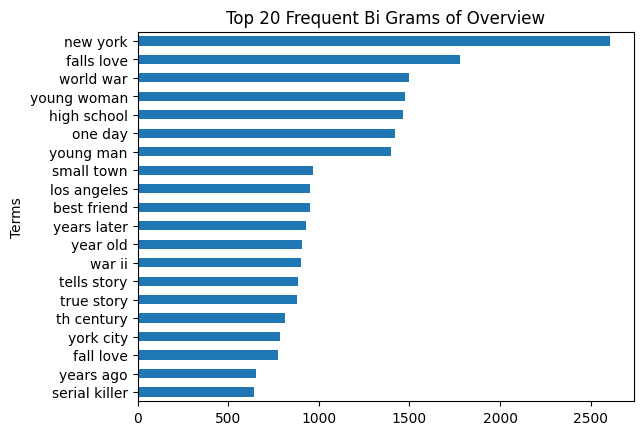

In [ ]:
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)
top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams of Overview")

In [ ]:
# Create subplots dynamically based on unique categories
categories = set(wordcloud_df['genre_name'])
num_categories = len(categories)

In [ ]:
categories

{'Action',
 'Adventure',
 'Animation',
 'Aniplex',
 'BROSTA TV',
 'Carousel Productions',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'GoHands',
 'History',
 'Horror',
 'Mardock Scramble Production Committee',
 'Music',
 'Mystery',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'Romance',
 'Science Fiction',
 'Sentai Filmworks',
 'TV Movie',
 'Telescene Film Group Productions',
 'The Cartel',
 'Thriller',
 'Vision View Entertainment',
 'War',
 'Western'}